## **Libraries**

In [1]:
import numpy as np # linear algebra

import matplotlib.pyplot as plt # this is used for the plot the graph

import torch
import torchvision
import torchvision.transforms as transforms

import unittest

## **Aufgabe 1**

In [2]:
# Datenset laden
# Laden des Trainingsdatensatzes
train = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)

# Laden des Testdatensatzes
test = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)

**Eigenschaften des MNIST-Datensatz**

In [3]:
# Anzeigen einiger grundlegender Eigenschaften des Datensatzes
print("Trainingsdatensatz:")
print("Anzahl der Bilder:", len(train))
print("Anzahl der Klassen:", len(train.classes))
print("Größe eines Bildes:", train[0][0].size())

print("\nTestdatensatz:")
print("Anzahl der Bilder:", len(test))
print("Anzahl der Klassen:", len(test.classes))
print("Größe eines Bildes:", test[0][0].size())

Trainingsdatensatz:
Anzahl der Bilder: 60000
Anzahl der Klassen: 10
Größe eines Bildes: torch.Size([1, 28, 28])

Testdatensatz:
Anzahl der Bilder: 10000
Anzahl der Klassen: 10
Größe eines Bildes: torch.Size([1, 28, 28])


In [4]:
print(f"Datentyp Datenset: {type(train)}")
print(f"Datentyp Element: {type(train[0])}")
print(f"Länge Element: {len(train[0])}")
print(f"Datentyp erster Eintrag: {type(train[0][0])}")
print(f"Datentyp zweiter Eintrag: {type(train[0][1])}")

Datentyp Datenset: <class 'torchvision.datasets.mnist.MNIST'>
Datentyp Element: <class 'tuple'>
Länge Element: 2
Datentyp erster Eintrag: <class 'torch.Tensor'>
Datentyp zweiter Eintrag: <class 'int'>


**Beispielbilder**

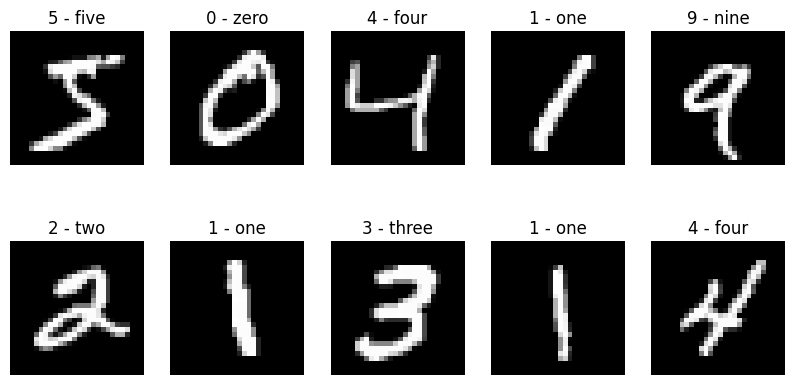

In [5]:
# Anzeigen einiger Beispieldaten aus dem Trainingsdatensatz
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train[i][0].squeeze().numpy(), cmap='gray')
    plt.title(train.classes[train[i][1]])
    plt.axis("off")
plt.show()

**Ein zufälliges Bild wird ausgewählt und vergrössert**

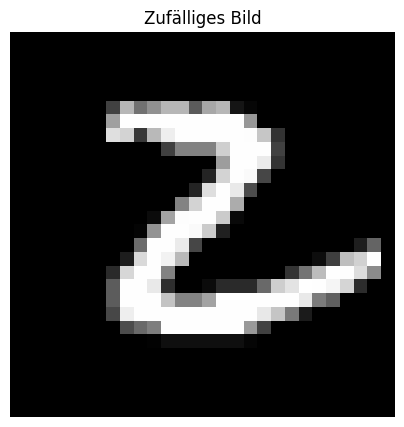

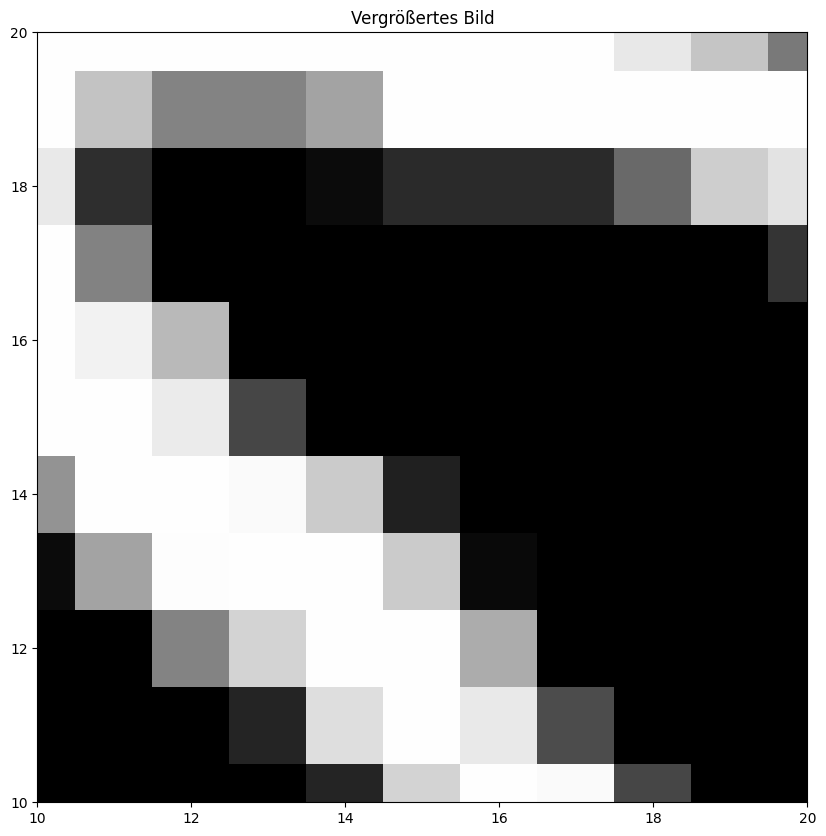

In [6]:
# Wähle zufällig ein Bild aus dem Datensatz aus
random_index = torch.randint(0, len(train), (1,)).item()
random_image = train[random_index][0].squeeze().numpy()

# Erzeuge den Plot für das zufällige Bild
plt.figure(figsize=(5, 5))
plt.imshow(random_image, cmap='gray')
plt.title("Zufälliges Bild")
plt.axis('off')
plt.show()

# Vergrößere das Bild und zeige es erneut an
plt.figure(figsize=(10, 10))
plt.imshow(random_image, cmap='gray')
plt.title("Vergrößertes Bild")
plt.axis('on')
plt.xlim(10, 20)  # Bereich zum Einzoomen festlegen
plt.ylim(10, 20)
plt.show()

**Verteilungen der Klassen (0-9)**

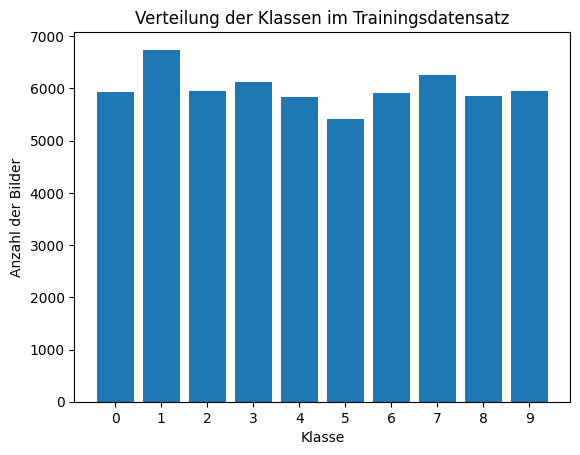

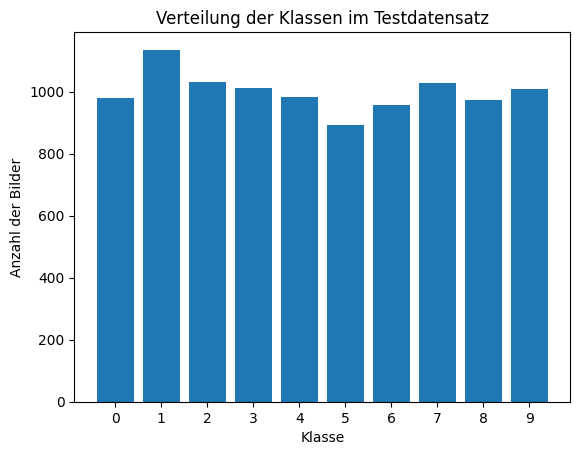

In [7]:
# Verteilung der Klassen im Trainingsdatensatz anzeigen
plt.hist(train.targets.numpy(), bins=range(11), rwidth=0.8, align='left')
plt.xticks(range(10))
plt.xlabel('Klasse')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Klassen im Trainingsdatensatz')
plt.show()

# Verteilung der Klassen im Testdatensatz anzeigen
plt.hist(test.targets.numpy(), bins=range(11), rwidth=0.8, align='left')
plt.xticks(range(10))
plt.xlabel('Klasse')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Klassen im Testdatensatz')
plt.show()

**Durchschnittliche Pixelintensität für jede Zifferklasse**

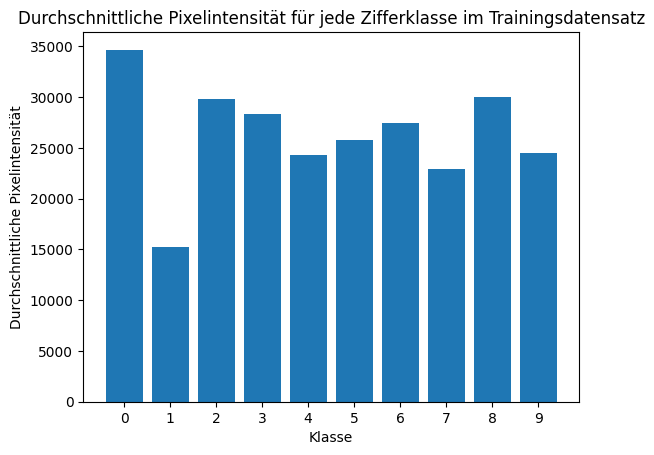

In [8]:
# Durchschnittliche Intensität der Pixel für jede Zifferklasse im Trainingsdatensatz berechnen
class_means = np.zeros(10)
class_counts = np.zeros(10)

for i in range(len(train.targets)):
    class_means[train.targets[i]] += train.data[i].sum()
    class_counts[train.targets[i]] += 1

class_means /= class_counts

# Balkendiagramm für die durchschnittliche Intensität der Pixel für jede Zifferklasse anzeigen
plt.bar(range(10), class_means)
plt.xlabel('Klasse')
plt.ylabel('Durchschnittliche Pixelintensität')
plt.title('Durchschnittliche Pixelintensität für jede Zifferklasse im Trainingsdatensatz')
plt.xticks(range(10))
plt.show()

## **Aufgabe 2**

**Erstellung Klasse LinearLayer**

In [9]:
class LinearLayer:
    """
    A simple Linear Layer.

    Parameters:
    -----------
    input_size: int
        The number of input features
    output_size: int
        The number of neurons in the output layer
    """
    def __init__(self, input_size, output_size):
        self.input_size = input_size # n x 786 (Anzahl Datensätze x Features)
        self.output_size = output_size # n x 64 (Anzahl Datensätze x Anzahl Hidden Size)
        
        # Initialize weights and biases
        self.weights = np.random.randn(self.input_size, self.output_size) # 786 x 64
        self.bias = np.zeros((1, self.output_size)) # 64 x 1

    def __str__(self):
        """
        Print the neural network architecture.
        """
        return f"Linear Layer Layout:\nInput Layer: {self.input_size} neurons\nHidden Layer: {self.output_size}"


    def forward(self, X):
        """
        Perform forward propagation.
        
        Parameters:
        -----------
        X: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The predicted output
        """
        # Store input for backward pass
        self.X = X

        # Perform forward propagation
        z1 = np.dot(self.X, self.weights) + self.bias # n x 64
        return z1

    def backward(self, dz):
        """
        Perform backpropagation for a single linear layer.
        
        Args:
          dz: numpy array
          Gradient of the cost with respect to the linear output of the layer.
          Returns:
          dx: numpy array
          Gradient of the cost with respect to the input of the layer.
          dw: numpy array
          Gradient of the cost with respect to the weights.
          db: numpy array
          Gradient of the cost with respect to the bias.
          """
        n = dz.shape[0]  # Number of samples in the batch / n x 64
        
        # Gradient of the loss with respect to the weights
        self.dw = 1/n * np.dot(self.X.T,dz) # (786 x n) * (n x 64) = 786 x 64
        
        # Gradient of the loss with respect to the bias
        self.db = np.sum(dz, axis=0, keepdims=True) / n # (n x 64) + 64 x 1 = 1 x 64
        
        # Gradient of the loss with respect to the input of the layer
        self.dx = np.dot(dz, self.weights.T) # (n x 64) * (64 x 786) = n x 786
        
        return self.dx, self.dw, self.db


    def update(self, dw, db, learning_rate):
        """
        Update weights and biases based on calculated gradients.
        
        Parameters:
        -----------
        dw: numpy array
            The gradient with respect to the weights.
        db: numpy array
            The gradient with respect to the biases.
        learning_rate: float
            The learning rate for updating the weights and biases.
        """
        # Update weights
        self.weights -= learning_rate * dw
        # Update biases
        self.bias -= learning_rate * db

**Handschriftliche Berechnung**

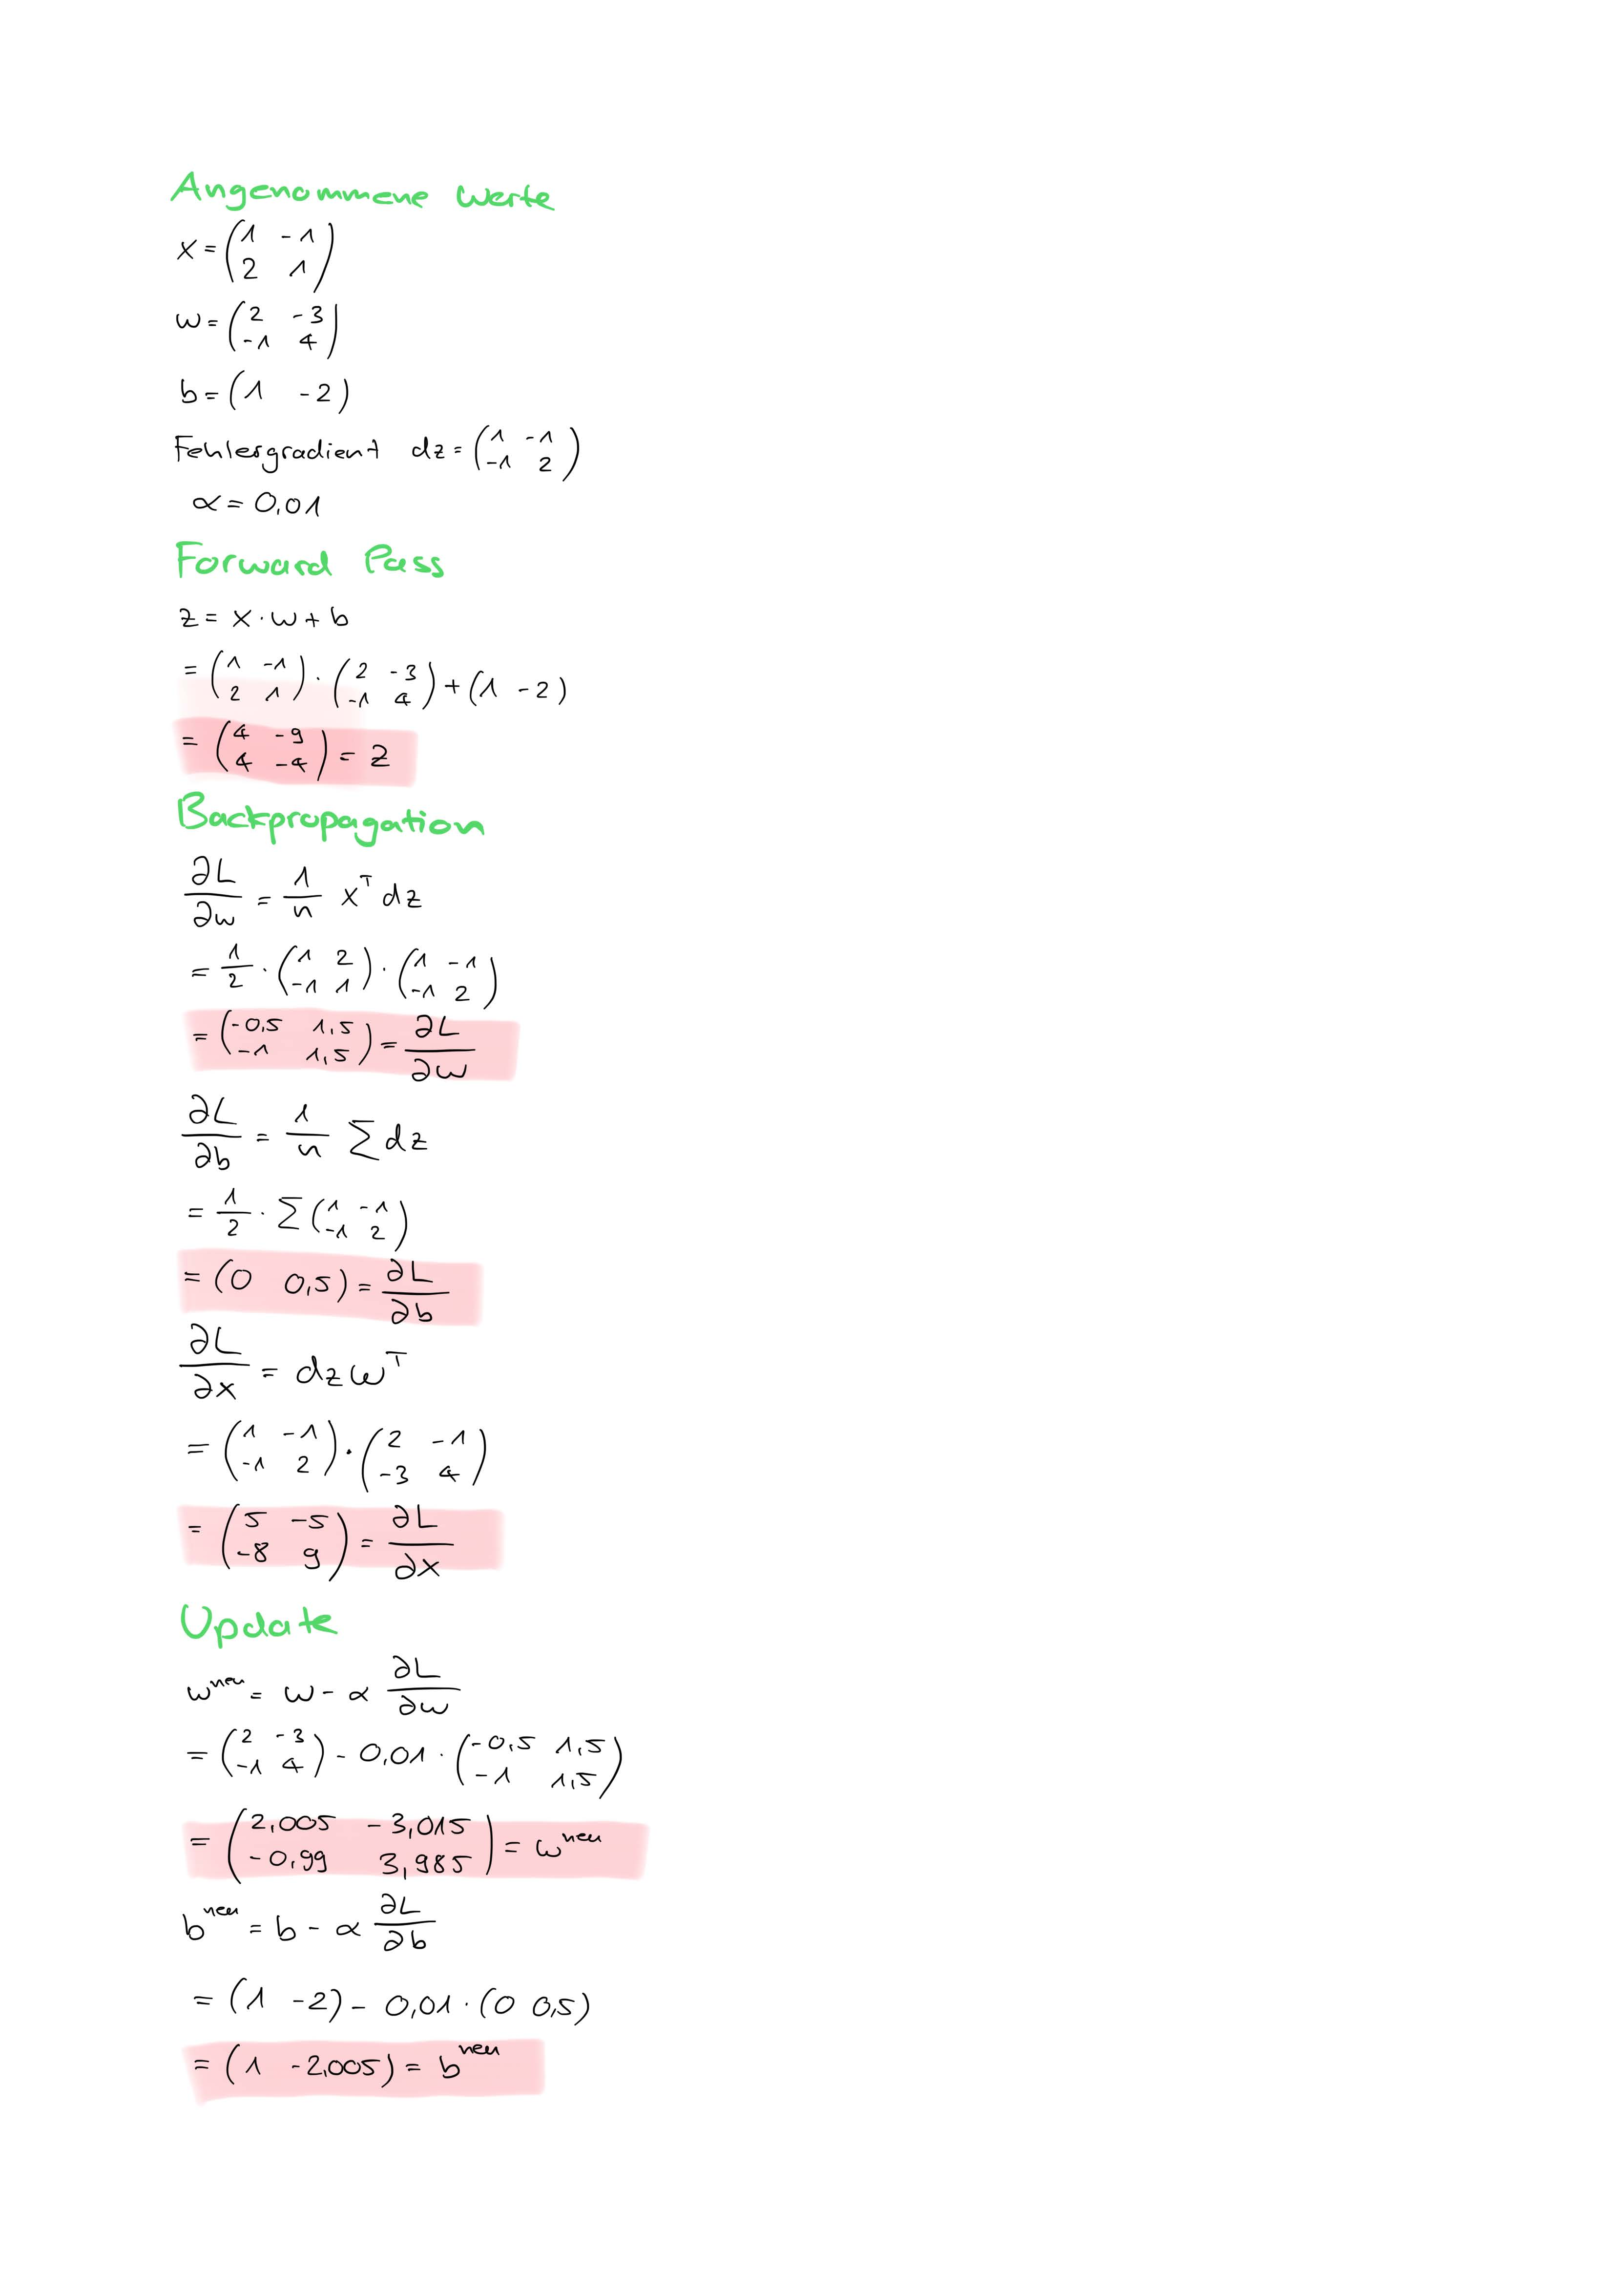

In [1]:
from IPython.display import display, Image

# Display the image
display(Image(filename="Handschriftliche_Berechnung.jpg"))

**Unittest**

In [10]:
class TestLinearLayer(unittest.TestCase):
    def setUp(self):
        # For reproducible results
        np.random.seed(42)
        # LinearLayer with predefined input and hidden size
        self.network = LinearLayer(input_size=2, output_size=2)
        # Set the weights and bias to known values
        self.network.weights = np.array([[2.0, -3.0], [-1.0, 4.0]], dtype=np.float64)
        self.network.bias = np.array([[1.0, -2.0]], dtype=np.float64)

    def test_forward(self):
        # Define a simple test case
        X = np.array([[1.0, -1.0], [2.0, 1.0]], dtype=np.float64)
        # Perform forward propagation
        output = self.network.forward(X)
        # Check if output has the correct shape
        self.assertEqual(output.shape, (2, 2))
        print(f"Forward Pass: {output}\n")

    def test_backward(self):
        # Input for backpropagation
        X = np.array([[1.0, -1.0], [2.0, 1.0]], dtype=np.float64)
        # Perform forward propagation
        self.network.forward(X)
        # Assume gradients for testing
        dz = np.array([[1.0, -1.0], [-1.0, 2.0]], dtype=np.float64)
        # Perform backward propagation
        self.dx, self.dw, self.db = self.network.backward(dz)
        # Check if gradients have the correct shape
        self.assertEqual(self.dx.shape, X.shape)
        self.assertEqual(self.dw.shape, self.network.weights.shape)
        self.assertEqual(self.db.shape, self.network.bias.shape)
        print("Backwarpropagation\n"
              f"dw1: {self.dw}\n"
              f"db1: {self.db}\n"
              f"dx: {self.dx}\n")

    def test_update(self):
        # Input for backpropagation
        X = np.array([[1.0, -1.0], [2.0, 1.0]], dtype=np.float64)
        # Perform forward propagation
        self.network.forward(X)
        # Assume gradients for testing
        dz = np.array([[1.0, -1.0], [-1.0, 2.0]], dtype=np.float64)
        # Perform backward propagation
        dx, dw, db = self.network.backward(dz)
        # Update weights and biases
        learning_rate = 0.01
        self.network.update(dw, db, learning_rate)
        # Check if weights and biases have been updated
        updated_weights = np.array([[2.0, -3.0], [-1.0, 4.0]], dtype=np.float64)
        updated_bias = np.array([[1.0, -2.0]], dtype=np.float64)
        self.assertFalse(np.array_equal(self.network.weights, updated_weights))
        self.assertFalse(np.array_equal(self.network.bias, updated_bias))
        print(f"Updated Weights: {updated_weights}\n\n"
              f"Updated Bias: {updated_bias}\n\n")

# Execute the tests
unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


Backwarpropagation
dw1: [[-0.5  1.5]
 [-1.   1.5]]
db1: [[0.  0.5]]
dx: [[ 5. -5.]
 [-8.  9.]]

Forward Pass: [[ 4. -9.]
 [ 4. -4.]]

Updated Weights: [[ 2. -3.]
 [-1.  4.]]

Updated Bias: [[ 1. -2.]]




## **Aufgabe 3**

##### Gewählte Kostenfunktion

$$ \text{BinaryCrossEntropyLoss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)$$

N = Anzahl Datenpunkte; yi = Wahre Klasse des ii-ten Datenpunkts (entweder 0 oder 1).; yi-dach: Vor-hergesagte Wahrscheinlichkeit dafür, dass der ii-te Datenpunkt zur Klasse 1 gehört.

Die Binary Cross-Entropy Loss-Funktion wird verwendet, um die Leistung eines binären Klassifikati-onsmodells zu bewerten, das eine binäre Ausgabe liefert (z.B. Ja/Nein, 1/0). Sie vergleicht die vorher-gesagten Wahrscheinlichkeiten für die positive Klasse (Klasse 1) mit den tatsächlichen Labels.

Vorteile: Die Binary Cross-Entropy Loss-Funktion ist speziell auf binäre Klassifikationsprobleme zuge-schnitten und eignet sich gut für Modelle, die nur zwischen zwei Klassen unterscheiden müssen. Die Funktion berücksichtigt die Wahrscheinlichkeitsverteilung der vorhergesagten Klassen und straft das Modell stark, wenn es sehr sicher über eine falsche Klasse ist. Dies führt zu einer besseren Kalibrierung der Vorhersagen. Sie ist differenzierbar, was sie gut für die Verwendung in Gradientenabstiegsverfah-ren macht, um die Modellparameter zu optimieren.

Nachteile: Die Funktion kann empfindlich auf extreme Vorhersagen reagieren, insbesondere wenn die vorhergesagten Wahrscheinlichkeiten nahe an 0 oder 1 liegen. Dies kann während des Trainings zu Instabilitäten führen und die Konvergenz des Modells beeinträchtigen. Die Binary Cross-Entropy Loss-Funktion ist auf binäre Klassifikationsprobleme beschränkt und kann nicht direkt auf Multi-Class-Klassifikationsprobleme angewendet werden, ohne Modifikationen vorzunehmen.


##### Alternative Kostenfunktion

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 $$

n = Anzahl Datenpunkte; ydach = vorhergesagte Werte; y = tatsächliche Werte

Misst durchschnittliche quadratische Differenz zwischen vorhergesagten Werten und tatsächlichen Wer-ten.

Vorteile: Obwohl MSE typischerweise für Regressionsprobleme verwendet wird, kann sie auch für Klassifikationsprobleme eingesetzt werden, insbesondere wenn die Ausgaben des neuronalen Netz-werks als kontinuierliche Werte und nicht als Wahrscheinlichkeiten interpretiert werden. Der Vorteil der Verwendung von MSE in einem neuronalen Netzwerk liegt darin, dass sie stetig differenzierbar ist, was das Gradientenabstiegsverfahren (Gradient Descent) erleichtert.

Nachteile: MSE behandelt die Ausgabe jedoch nicht als Wahrscheinlichkeit und kann daher nicht direkt die Unsicherheit einer Vorhersage ausdrücken. Für Klassifizierungsaufgaben kann das zu Problemen führen, weil es keinen Unterschied macht, ob die Vorhersage mit hoher oder niedriger Sicherheit falsch ist.

##### Gewählte Evaluationsfunktion

$$ \text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Datenpunkte}}{\text{Gesamtanzahl der Datenpunkte}} $$


Die Accuracy (Genauigkeit) ist eine Evaluationsmetrik, die angibt, wie viele Vorhersagen eines Modells korrekt sind im Verhältnis zur Gesamtanzahl der Vorhersagen.

Vorteile: Accuracy ist eine intuitive Metrik, die einfach zu verstehen und zu implementieren ist. Sie gibt direkt an, welcher Prozentsatz der Vorhersagen korrekt ist.

Nachteile: Ein Hauptnachteil von Accuracy ist, dass sie nicht gut funktioniert, wenn die Klassen ungleich verteilt sind, was im MNIST-Datensatz allerdings normalerweise nicht der Fall ist. Bei unausgewogenen Datensätzen kann sie irreführend sein, da sie die Leistung bei weniger häufigen Klassen nicht angemessen widerspiegelt.

##### Alternative Evaluationsfunktion

$$
\begin{array}{c|c|c|c|c}
\text{} & \text{Klasse 1} & \text{Klasse 2} & \cdots & \text{Klasse } k \\
\hline
\text{Klasse 1} & \text{TP} & \text{FN} & \cdots & \text{} \\
\hline
\text{Klasse 2} & \text{FP} & \text{TN} & \cdots & \text{} \\
\hline
\vdots & \vdots & \vdots & \ddots & \vdots \\
\hline
\text{Klasse } k & \text{} & \text{} & \cdots & \text{} \\
\end{array}
$$


Die Konfusionsmatrix gibt nicht nur Auskunft darüber, wie viele Vorhersagen korrekt oder falsch sind, sondern auch, wie die Fehler verteilt sind.

Vorteile: Sie ist besonders nützlich, um ein detaillierteres Verständnis der Leistung des Modells zu er-langen, insbesondere, wenn man an der Art der Fehler interessiert ist (z. B. welche Zahlen häufig mitei-nander verwechselt werden).

Nachteile: Eine Konfusionsmatrix kann bei einer großen Anzahl von Klassen unübersichtlich sein und bietet keine einzige Metrik, anhand derer die Gesamtleistung des Modells beurteilt werden kann. Sie ist eher ein Werkzeug für eine tiefere Analyse als eine Evaluationsmetrik, die eine schnelle Leistungsüber-prüfung ermöglicht.

**Erstellung Klasse Loss Function**

In [11]:
class BinaryCrossEntropyLoss:
    def __call__(self, y_pred, y_true):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def derivative(self, y_pred, y_true):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return - (y_true / y_pred) + (1 - y_true) / (1 - y_pred)

# Instanz der Loss-Funktion erstellen
loss_function = BinaryCrossEntropyLoss()

**Erstellung Klasse NeuralNetwork**

In [12]:
class NeuralNetwork:
    """
    A simple neural network with one hidden layer.

    Parameters:
    -----------
    input_size: int
        The number of input features
    hidden_size: int
        The number of neurons in the hidden layer
    output_size: int
        The number of neurons in the output layer
    """
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize layers
        self.linear_layer1 = LinearLayer(input_size, hidden_size)
        self.sigmoid1 = Sigmoid()
        self.linear_layer2 = LinearLayer(hidden_size, output_size)
        self.sigmoid2 = Sigmoid()

    def __str__(self):
        """
        Print the neural network architecture.
        """
        return f"Neural Network:\nInput Size: {self.input_size}\nHidden Size: {self.hidden_size}\nOutput Size: {self.output_size}"

    def forward(self, X):
        """
        Perform forward propagation.

        Parameters:
        -----------
        X: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The predicted output
        """
        self.X = X

        # Forward pass through first linear layer and activation
        z1 = self.linear_layer1.forward(self.X)
        a1 = self.sigmoid1.forward(z1)
        
        # Forward pass through second linear layer and activation 
        z2 = self.linear_layer2.forward(a1)
        self.a2 = self.sigmoid2.forward(z2) # n x 1

        return self.a2
    
    def backward(self,X, y, loss_grad):
        """
        Perform backpropagation.

        Parameters:
        -----------
        X: numpy array
            The input data
        y: numpy array
            The target output
        learning_rate: float
            The learning rate
        """
        # Compute gradients for the output layer
        n = y.shape[0]

        dz2 = self.sigmoid2.backward(loss_grad)
        da1, dw2, db2 = self.linear_layer2.backward(dz2)
        dz1 = self.sigmoid1.backward(da1)
        dx, dw1, db1 = self.linear_layer1.backward(dz1)
        return dx, dw1, db1, dw2, db2
        
    def update(self, dw1, db1, dw2, db2, learning_rate):
        self.linear_layer1.update(dw1, db1, learning_rate)
        self.linear_layer2.update(dw2, db2, learning_rate)

class Sigmoid:
    def forward(self, z):
        """
        Sigmoid activation function.

        Parameters:
        -----------
        z: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The output of the sigmoid function
        """
        self.z = z
        return 1 / (1 + np.exp(-z))

    def backward(self, da):
        """
        Derivative of the sigmoid activation function.

        Parameters:
        -----------
        da: numpy array
            The upstream gradient
        
        Returns:
        --------
        numpy array
            The gradient of the loss with respect to the input
        """
        sig = 1 / (1 + np.exp(-self.z))
        return da * sig * (1 - sig)

**Trainer Class**

In [13]:
class Trainer:
    def __init__(self, model, loss_fn):
        self.model = model
        self.loss_fn = loss_fn
        self.train_loss = []
        self.test_loss = []

    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred_train = self.model.forward(X_train)
            train_loss = self.loss_fn(y_pred_train, y_train)
            loss_grad = self.loss_fn.derivative(y_pred_train, y_train)

            # Übergeben von `y_train` an die `backward` Methode
            dx, dw1, db1, dw2, db2 = self.model.backward(X_train, y_train, loss_grad)

            self.model.update(dw1, db1, dw2, db2, learning_rate)
            train_accuracy = self.calculate_accuracy(y_train, y_pred_train)
            self.train_loss.append(train_loss)

            y_pred_test = self.model.forward(X_test)
            test_loss = self.loss_fn(y_pred_test, y_test)
            test_accuracy = self.calculate_accuracy(y_test, y_pred_test)
            self.test_loss.append(test_loss)

            print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    def calculate_accuracy(self, y_true, y_pred):
        predictions = (y_pred > 0.5).astype(int)
        return np.mean(predictions == y_true)

**Skalierung der Datensätze**

In [14]:
# Laden des Trainingsdatensatzes ohne Transformationen
train = torchvision.datasets.MNIST(root='./data', train=True, download=True)

# Laden des Testdatensatzes ohne Transformationen
test = torchvision.datasets.MNIST(root='./data', train=False, download=True)
 
# Extrahiere die Features (Bilder) und die Labels aus dem Trainingsdatensatz
train_features = np.array(train.data)
train_labels = np.array(train.targets)
 
# Extrahiere die Features (Bilder) und die Labels aus dem Testdatensatz
test_features = np.array(test.data)
test_labels = np.array(test.targets)
 
# Min und Max Werte der Features berechnen
mini = np.min(train_features)
maxi = np.max(train_features)
 
# Skalierung der Features für den Trainingsdatensatz
train_features_scaled = ((train_features.astype(float) - mini) / (maxi - mini))

# Skalierung der Features für den Testdatensatz
test_features_scaled = ((test_features.astype(float) - mini) / (maxi - mini))
 
# Min und Max Werte der skalierten Features des Trainingsdatensatzes
print("Min/Max nach Skalierung (Train):", np.min(train_features_scaled), np.max(train_features_scaled))
 
# Min und Max Werte der skalierten Features des Testdatensatzes
print("Min/Max nach Skalierung (Test):", np.min(test_features_scaled), np.max(test_features_scaled))
 
# Drucken der Form der skalierten Features und der One-Hot-kodierten Labels
print("Form der skalierten Trainingsfeatures:", train_features_scaled.shape)
print("Form der skalierten Testfeatures:", test_features_scaled.shape)

Min/Max nach Skalierung (Train): 0.0 1.0
Min/Max nach Skalierung (Test): 0.0 1.0
Form der skalierten Trainingsfeatures: (60000, 28, 28)
Form der skalierten Testfeatures: (10000, 28, 28)


**Erstellung des Neural Network**

In [15]:
# Filtern der Trainings- und Testdaten für die Ziffer "8"
train_features_8 = train_features_scaled[train_labels == 8]
test_features_8 = test_features_scaled[test_labels == 8]

# Setzen der Labels für die Ziffer "8" auf 1, alle anderen auf 0
train_labels_8 = np.ones((train_features_8.shape[0], 1))
test_labels_8 = np.ones((test_features_8.shape[0], 1))

# Filtern der Trainings- und Testdaten für alle anderen Ziffern
train_features_other = train_features_scaled[train_labels != 8]
test_features_other = test_features_scaled[test_labels != 8]

# Setzen der Labels für alle anderen Ziffern auf 0
train_labels_other = np.zeros((train_features_other.shape[0], 1))
test_labels_other = np.zeros((test_features_other.shape[0], 1))

# Kombinieren der Trainings- und Testdaten für die Ziffer "8" und alle anderen Ziffern
X_train = np.vstack((train_features_8, train_features_other))
y_train = np.vstack((train_labels_8, train_labels_other.reshape(-1, 1)))  # reshape für die zweite Dimension
X_test = np.vstack((test_features_8, test_features_other))
y_test = np.vstack((test_labels_8, test_labels_other.reshape(-1, 1)))  # reshape für die zweite Dimension

X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)  # Umformen der Testdaten, jedes Bild hat 28x28 Pixel

# Initialisierung des neuronalen Netzwerks
input_size = 28*28  # Anzahl der Features
hidden_size = 64  # Anzahl der Neuronen in der versteckten Schicht
output_size = 1  # Ausgabegröße (1 für binäre Klassifikation)
neural_network = NeuralNetwork(input_size, hidden_size, output_size)

# Initialisierung des Trainers
trainer = Trainer(neural_network, loss_function)

# Training des neuronalen Netzwerks
epochs = 10
learning_rate = 0.001
trainer.train(X_train, y_train, X_test, y_test, epochs, learning_rate)

# Ausgabe des Trainings- und Testverlusts
print("Trainingsverlust:", trainer.train_loss)
print("Testverlust:", trainer.test_loss)

Epoch 1/10: Train Loss: 0.8115, Train Accuracy: 0.8211, Test Loss: 0.8211, Test Accuracy: 0.8201
Epoch 2/10: Train Loss: 0.8115, Train Accuracy: 0.8211, Test Loss: 0.8211, Test Accuracy: 0.8201
Epoch 3/10: Train Loss: 0.8115, Train Accuracy: 0.8211, Test Loss: 0.8210, Test Accuracy: 0.8202
Epoch 4/10: Train Loss: 0.8114, Train Accuracy: 0.8212, Test Loss: 0.8210, Test Accuracy: 0.8202
Epoch 5/10: Train Loss: 0.8114, Train Accuracy: 0.8212, Test Loss: 0.8209, Test Accuracy: 0.8203
Epoch 6/10: Train Loss: 0.8113, Train Accuracy: 0.8212, Test Loss: 0.8209, Test Accuracy: 0.8203
Epoch 7/10: Train Loss: 0.8113, Train Accuracy: 0.8212, Test Loss: 0.8209, Test Accuracy: 0.8203
Epoch 8/10: Train Loss: 0.8113, Train Accuracy: 0.8212, Test Loss: 0.8208, Test Accuracy: 0.8203
Epoch 9/10: Train Loss: 0.8112, Train Accuracy: 0.8213, Test Loss: 0.8208, Test Accuracy: 0.8203
Epoch 10/10: Train Loss: 0.8112, Train Accuracy: 0.8213, Test Loss: 0.8207, Test Accuracy: 0.8203
Trainingsverlust: [0.81154007

## **Aufgabe 4**

Epoch 1/10: Train Loss: 0.7384, Train Accuracy: 0.3809, Test Loss: 0.7333, Test Accuracy: 0.3889
Epoch 2/10: Train Loss: 0.7343, Train Accuracy: 0.3876, Test Loss: 0.7292, Test Accuracy: 0.3962
Epoch 3/10: Train Loss: 0.7302, Train Accuracy: 0.3955, Test Loss: 0.7251, Test Accuracy: 0.4085
Epoch 4/10: Train Loss: 0.7261, Train Accuracy: 0.4077, Test Loss: 0.7211, Test Accuracy: 0.4254
Epoch 5/10: Train Loss: 0.7221, Train Accuracy: 0.4215, Test Loss: 0.7171, Test Accuracy: 0.4403
Epoch 6/10: Train Loss: 0.7181, Train Accuracy: 0.4337, Test Loss: 0.7132, Test Accuracy: 0.4512
Epoch 7/10: Train Loss: 0.7142, Train Accuracy: 0.4475, Test Loss: 0.7093, Test Accuracy: 0.4658
Epoch 8/10: Train Loss: 0.7103, Train Accuracy: 0.4625, Test Loss: 0.7055, Test Accuracy: 0.4937
Epoch 9/10: Train Loss: 0.7065, Train Accuracy: 0.4906, Test Loss: 0.7017, Test Accuracy: 0.5595
Epoch 10/10: Train Loss: 0.7027, Train Accuracy: 0.5523, Test Loss: 0.6979, Test Accuracy: 0.5799
Epoch 1/10: Train Loss: 0.423

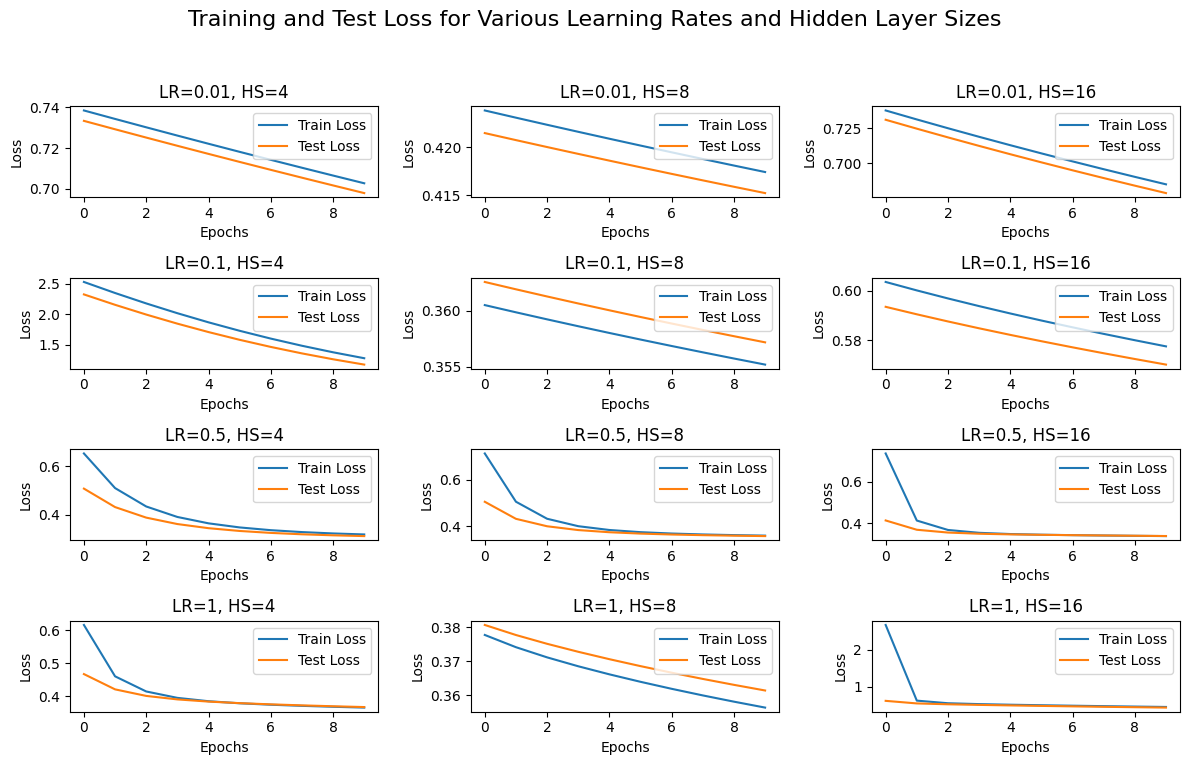

In [16]:
# Lernraten und Größen des Hidden Layers
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_sizes = [4, 8, 16]

# Für das Speichern der Ergebnisse
results = {}

# Experimente durchführen
for lr in learning_rates:
    for hs in hidden_sizes:
        # Initialisierung des neuronalen Netzwerks mit gegebener Hidden Layer-Größe
        neural_network = NeuralNetwork(28*28, hs, 1)  # 28*28 Eingabegröße, 1 Ausgabegröße
        trainer = Trainer(neural_network, loss_function)

        # Training des neuronalen Netzwerks
        trainer.train(X_train, y_train, X_test, y_test, epochs, lr)        
        # Ergebnisse speichern
        results[(lr, hs)] = {
            'train_loss': trainer.train_loss,
            'test_loss': trainer.test_loss
        }

# Analyse der Ergebnisse
for (lr, hs), res in results.items():
    print(f"Lernrate: {lr}, Hidden Size: {hs}")
    print(f"Trainingsverlust: {res['train_loss'][-1]}, Testverlust: {res['test_loss'][-1]}")

# Einstellen der Plotgröße für bessere Sichtbarkeit
plt.figure(figsize=(12, 8))

# Titel des gesamten Plots
plt.suptitle('Training and Test Loss for Various Learning Rates and Hidden Layer Sizes', fontsize=16)

# Zähler für die Plot-Nummern
plot_number = 1

# Erstellen eines Plots für jede Konfiguration
for (lr, hs), res in results.items():
    plt.subplot(len(learning_rates), len(hidden_sizes), plot_number)
    plt.plot(res['train_loss'], label='Train Loss')
    plt.plot(res['test_loss'], label='Test Loss')
    plt.title(f'LR={lr}, HS={hs}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plot_number += 1

# Verbesserung der Layouts, um Überlappungen zu vermeiden
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Interpretation**

1.) Reaktion auf Lernraten: Bei einer niedrigen Lernrate von 0.01 konvergieren Training- und Testverlust langsamer als bei höheren Lernraten. Dies deutet auf eine vorsichtige Anpassung der Modellgewichte hin, die zu einem langsameren, aber stetigen Lernfortschritt führt. Im Kontrast dazu zeigt eine Lernrate von 1 in allen drei HS-Konfigurationen ein sehr schnelles Konvergieren in den ersten Epochen, was zu einer potenziellen Überanpassung (Overfitting) führen könnte, wie durch das Auseinandergehen von Trainings- und Testverlust angedeutet wird.

2.) Einfluss der Größe der versteckten Schicht: Die Größe der versteckten Schicht beeinflusst ebenfalls das Lernverhalten. Bei kleineren Schichten (HS=4) sind die Verluste tendenziell höher als bei größeren Schichten. Dies könnte darauf hindeuten, dass Modelle mit mehr Neuronen komplexere Muster aus den Daten lernen können. Allerdings ist bei einer zu hohen Anzahl von Neuronen (HS=16) mit einer Lernrate von 1 die Gefahr des Overfittings besonders groß, was durch den wieder ansteigenden Testverlust angezeigt wird.

3.) Optimale Kombination: Die optimale Kombination von Lernrate und Größe der versteckten Schicht ist diejenige, die zu einem niedrigen und stabilen Testverlust führt. Auf Grundlage der bereitgestellten Graphen scheint die Kombination LR=0.1, HS=8 zu sein. Diese Einstellung führt zu einem stetigen und konsistenten Abfall des Testverlustes über die Epochen hinweg, ohne Anzeichen von Overfitting oder Unteranpassung (Underfitting).

## **Aufgabe 5**

Das Training eines neuronalen Netzes mit dem gesamten Datensatz auf einmal kann zu mehreren Problemen führen:

Speicherbedarf: Wenn der Datensatz groß ist, kann er möglicherweise nicht vollständig in den Arbeitsspeicher geladen werden. Das kann zu einem Absturz des Programms führen oder die Leistung beeinträchtigen, wenn das System anfängt, auf die Festplatte auszulagern.

Rechenzeit: Große Datensätze erfordern viele Rechenschritte, um ein Modell zu trainieren. Das Training auf dem gesamten Datensatz kann daher sehr lange dauern und möglicherweise zu einem langsamen Lernprozess führen.

Generalisierung: Das Training auf dem gesamten Datensatz könnte zu einem Überanpassen (Overfitting) des Modells führen, insbesondere wenn der Datensatz nicht gut ausbalanciert ist. Das Modell könnte dann die Daten im Training auswendig lernen, ohne die zugrunde liegenden Muster zu generalisieren, was zu einer schlechten Leistung auf neuen Daten führen kann.

In [17]:
class NeuralNetwork3:
    """
    A simple neural network with three hidden layers.

    Parameters:
    -----------
    input_size: int
        The number of input features
    hidden_size1: int
        The number of neurons in the first hidden layer
    hidden_size2: int
        The number of neurons in the second hidden layer
    hidden_size3: int
        The number of neurons in the third hidden layer
    output_size: int
        The number of neurons in the output layer
    """
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.hidden_size3 = hidden_size3
        self.output_size = output_size
        
        # Initialize layers
        self.linear_layer1 = LinearLayer(input_size, hidden_size1)
        self.sigmoid1 = Sigmoid()
        self.linear_layer2 = LinearLayer(hidden_size1, hidden_size2)
        self.sigmoid2 = Sigmoid()
        self.linear_layer3 = LinearLayer(hidden_size2, hidden_size3)
        self.sigmoid3 = Sigmoid()
        self.linear_layer4 = LinearLayer(hidden_size3, output_size)
        self.sigmoid4 = Sigmoid()

    def __str__(self):
        """
        Print the neural network architecture.
        """
        return f"Neural Network:\nInput Size: {self.input_size}\nHidden Size 1: {self.hidden_size1}\nHidden Size 2: {self.hidden_size2}\nHidden Size 3: {self.hidden_size3}\nOutput Size: {self.output_size}"

    def forward(self, X):
        """
        Perform forward propagation.

        Parameters:
        -----------
        X: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The predicted output
        """
        self.X = X

        # Forward pass through first linear layer and activation
        z1 = self.linear_layer1.forward(self.X)
        a1 = self.sigmoid1.forward(z1)
        
        # Forward pass through second linear layer and activation 
        z2 = self.linear_layer2.forward(a1)
        a2 = self.sigmoid2.forward(z2)

        # Forward pass through third linear layer and activation
        z3 = self.linear_layer3.forward(a2)
        a3 = self.sigmoid3.forward(z3)

        # Forward pass through fourth linear layer and activation
        z4 = self.linear_layer4.forward(a3)
        self.a4 = self.sigmoid4.forward(z4)

        return self.a4
    
    def backward(self,X, y, loss_grad):
        """
        Perform backpropagation.

        Parameters:
        -----------
        X: numpy array
            The input data
        y: numpy array
            The target output
        loss_grad: numpy array
            The gradient of the loss function with respect to the output
        """
        # Compute gradients for the output layer
        dz4 = self.sigmoid4.backward(loss_grad)
        da3, dw4, db4 = self.linear_layer4.backward(dz4)
        dz3 = self.sigmoid3.backward(da3)
        da2, dw3, db3 = self.linear_layer3.backward(dz3)
        dz2 = self.sigmoid2.backward(da2)
        da1, dw2, db2 = self.linear_layer2.backward(dz2)
        dz1 = self.sigmoid1.backward(da1)
        dx, dw1, db1 = self.linear_layer1.backward(dz1)
        
        return dx, dw1, db1, dw2, db2, dw3, db3, dw4, db4
        
    def update(self, dw1, db1, dw2, db2, dw3, db3, dw4, db4, learning_rate):
        self.linear_layer1.update(dw1, db1, learning_rate)
        self.linear_layer2.update(dw2, db2, learning_rate)
        self.linear_layer3.update(dw3, db3, learning_rate)
        self.linear_layer4.update(dw4, db4, learning_rate)


**Datensätze vorbereiten**

In [18]:
# One-Hot-Kodierung der Labels
def one_hot_encoding(labels, num_classes):
    onehot_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        onehot_labels[i][label] = 1
    return onehot_labels

num_classes = 10 # Anzahl der Klassen (0-9)
train_labels_onehot = one_hot_encoding(train_labels, num_classes)
test_labels_onehot = one_hot_encoding(test_labels, num_classes)

# Vorformen der Daten
X_train = train_features_scaled.reshape(60000, -1)
X_test = test_features_scaled.reshape(10000, -1)

# Zuweisen der vorbereiteten Labels
y_train = train_labels_onehot
y_test = test_labels_onehot

**Trainer Class**

In [19]:
class Trainer3:
    def __init__(self, model, loss_fn):
        self.model = model
        self.loss_fn = loss_fn
        self.train_loss = []
        self.test_loss = []

    def train(self, X_train, y_train, X_test, y_test, epochs, batch_size, learning_rate):

        num_train_samples = X_train.shape[0]
        num_batches = num_train_samples // batch_size

        for epoch in range(epochs):
            # Shuffle data for each epoch
            indices = np.arange(num_train_samples)
            np.random.shuffle(indices)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]

            for batch in range(num_batches):
                start_idx = batch * batch_size
                end_idx = (batch + 1) * batch_size
                X_batch = X_train_shuffled[start_idx:end_idx]
                y_batch = y_train_shuffled[start_idx:end_idx]

                y_pred_train = self.model.forward(X_batch)
                train_loss = self.loss_fn(y_pred_train, y_batch)
                self.train_loss.append(train_loss)
                loss_grad = self.loss_fn.derivative(y_pred_train, y_batch)

                dx, dw1, db1, dw2, db2, dw3, db3, dw4, db4 = self.model.backward(X_batch, y_batch, loss_grad)

                self.model.update(dw1, db1, dw2, db2, dw3, db3, dw4, db4, learning_rate)
                
                # Calculate and store test loss for each batch
                y_pred_test = self.model.forward(X_test)
                test_loss = self.loss_fn(y_pred_test, y_test)
                self.test_loss.append(test_loss)

            # After each epoch, evaluate performance on test set
            test_accuracy = self.calculate_accuracy(y_test, y_pred_test)
            print(f"Epoch {epoch+1}/{epochs}: Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    def calculate_accuracy(self, y_true, y_pred):
        predictions = (y_pred > 0.5).astype(int)
        return np.mean(predictions == y_true)

In [20]:
# Initialisierung des neuronalen Netzwerks
batch_size = 64
input_size = 28*28  # Anzahl der Features
hidden_size1 = 64  # Anzahl der Neuronen in der versteckten Schicht
hidden_size2 = 64
hidden_size3 = 64
output_size = 10
neural_network = NeuralNetwork3(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Initialisierung des Trainers
trainer = Trainer3(neural_network, loss_function)

# Training des neuronalen Netzwerks
epochs = 10
learning_rate = 0.001
trainer.train(X_train, y_train, X_test, y_test, epochs, batch_size, learning_rate)

# Ausgabe des Trainings- und Testverlusts
print("Trainingsverlust:", trainer.train_loss)
print("Testverlust:", trainer.test_loss)

Epoch 1/10: Test Loss: 0.3748, Test Accuracy: 0.8928
Epoch 2/10: Test Loss: 0.3410, Test Accuracy: 0.8950
Epoch 3/10: Test Loss: 0.3277, Test Accuracy: 0.8963
Epoch 4/10: Test Loss: 0.3173, Test Accuracy: 0.8979
Epoch 5/10: Test Loss: 0.3087, Test Accuracy: 0.8995
Epoch 6/10: Test Loss: 0.3012, Test Accuracy: 0.9010
Epoch 7/10: Test Loss: 0.2948, Test Accuracy: 0.9022
Epoch 8/10: Test Loss: 0.2891, Test Accuracy: 0.9035
Epoch 9/10: Test Loss: 0.2841, Test Accuracy: 0.9045
Epoch 10/10: Test Loss: 0.2795, Test Accuracy: 0.9053
Trainingsverlust: [2.3644964809670146, 2.432068339406791, 2.4747599272181398, 2.4097622333490536, 2.409128471500447, 2.5167792697011633, 2.3562796280946827, 2.3137672490395964, 2.2303455942167196, 2.478401109702383, 2.32198863500421, 2.288839687236858, 2.2793735483447723, 2.231833289806535, 2.2753538098909494, 2.375844522702826, 2.3059536285704842, 2.167785014082076, 2.147952777785466, 2.2028163252586834, 2.2470954029105914, 2.2553613324887456, 2.1886025544864283, 

**Varriieren der Lernrate und Hidden_size**

Epoch 1/10: Test Loss: 0.3277, Test Accuracy: 0.9000
Epoch 2/10: Test Loss: 0.3242, Test Accuracy: 0.9000
Epoch 3/10: Test Loss: 0.3238, Test Accuracy: 0.9000
Epoch 4/10: Test Loss: 0.3234, Test Accuracy: 0.9000
Epoch 5/10: Test Loss: 0.3228, Test Accuracy: 0.9000
Epoch 6/10: Test Loss: 0.3222, Test Accuracy: 0.9000
Epoch 7/10: Test Loss: 0.3212, Test Accuracy: 0.9000
Epoch 8/10: Test Loss: 0.3200, Test Accuracy: 0.9000
Epoch 9/10: Test Loss: 0.3185, Test Accuracy: 0.9000
Epoch 10/10: Test Loss: 0.3167, Test Accuracy: 0.9000
Epoch 1/10: Test Loss: 0.3195, Test Accuracy: 0.9000
Epoch 2/10: Test Loss: 0.3163, Test Accuracy: 0.9000
Epoch 3/10: Test Loss: 0.3125, Test Accuracy: 0.9000
Epoch 4/10: Test Loss: 0.3077, Test Accuracy: 0.9000
Epoch 5/10: Test Loss: 0.3019, Test Accuracy: 0.9000
Epoch 6/10: Test Loss: 0.2957, Test Accuracy: 0.9000
Epoch 7/10: Test Loss: 0.2897, Test Accuracy: 0.9000
Epoch 8/10: Test Loss: 0.2842, Test Accuracy: 0.9003
Epoch 9/10: Test Loss: 0.2792, Test Accuracy:

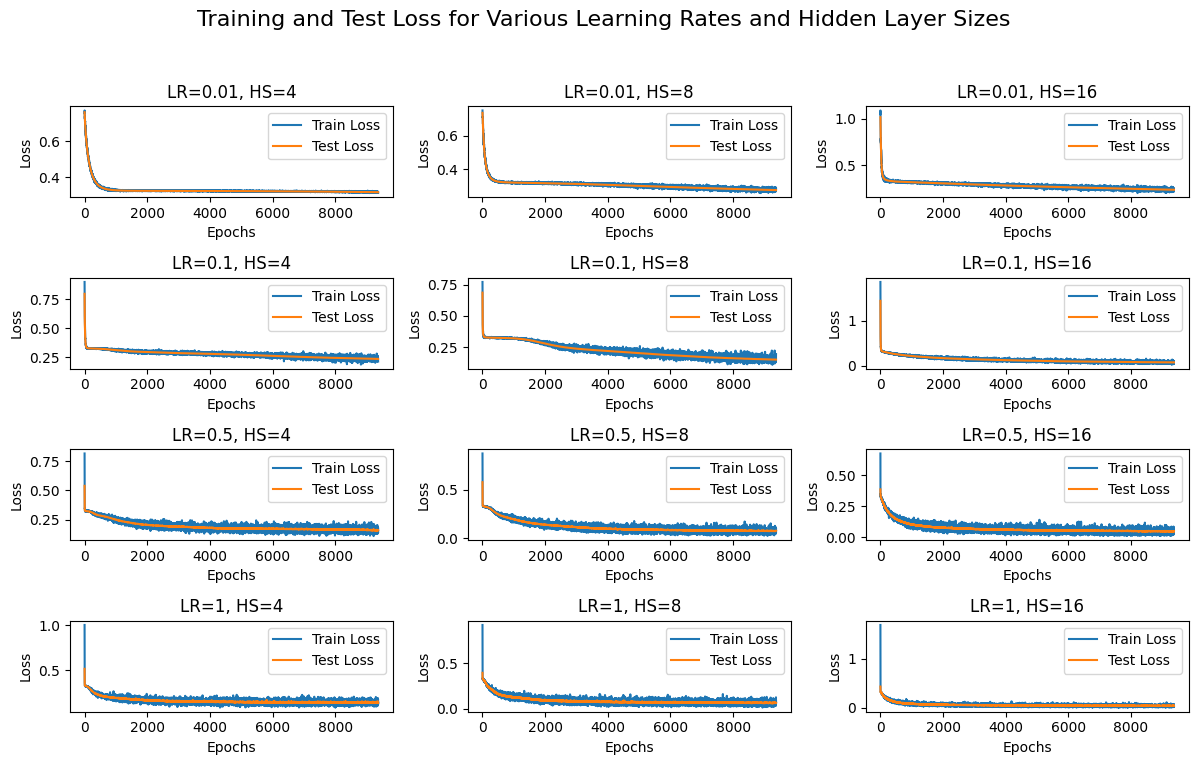

In [21]:
# Lernraten und Größen des Hidden Layers
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_sizes = [4, 8, 16]

# Für das Speichern der Ergebnisse
results = {}

# Experimente durchführen
for lr in learning_rates:
    for hs in hidden_sizes:
        # Initialisierung des neuronalen Netzwerks mit gegebener Hidden Layer-Größe
        neural_network = NeuralNetwork3(28*28, hs, hs, hs, 10)  # 28*28 Eingabegröße, 10 Ausgabegröße
        trainer = Trainer3(neural_network, loss_function)

        # Training des neuronalen Netzwerks
        trainer.train(X_train, y_train, X_test, y_test, epochs, batch_size, lr)        
        # Ergebnisse speichern
        results[(lr, hs)] = {
            'train_loss': trainer.train_loss,
            'test_loss': trainer.test_loss
        }

# Einstellen der Plotgröße für bessere Sichtbarkeit
plt.figure(figsize=(12, 8))

# Titel des gesamten Plots
plt.suptitle('Training and Test Loss for Various Learning Rates and Hidden Layer Sizes', fontsize=16)

# Zähler für die Plot-Nummern
plot_number = 1

# Erstellen eines Plots für jede Konfiguration
for (lr, hs), res in results.items():
    plt.subplot(len(learning_rates), len(hidden_sizes), plot_number)
    plt.plot(res['train_loss'], label='Train Loss')
    plt.plot(res['test_loss'], label='Test Loss')
    plt.title(f'LR={lr}, HS={hs}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plot_number += 1

# Verbesserung der Layouts, um Überlappungen zu vermeiden
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Interpretation**

1.) LR=0.01, HS=4/8/16: Für alle drei HS-Werte ist ein schneller Rückgang des Verlustes zu Beginn zu sehen, der sich dann stabilisiert. Die Testverluste bleiben nahe an den Trainingsverlusten, was darauf hindeutet, dass das Modell nicht überangepasst ist. Die größere versteckte Schicht (HS=16) führt nicht zu einem signifikanten Vorteil gegenüber kleineren Schichten.

2.) LR=0.1, HS=4/8/16: Bei dieser Lernrate ist der Verlust bereits nach wenigen Epochen stark reduziert und bleibt dann konstant niedrig, sowohl für Trainings- als auch für Testdaten. Die Linien verlaufen parallel, was auf eine gute Generalisierungsfähigkeit des Modells hinweist.

3.) LR=0.5, HS=4/8/16: Hier zeigt sich ein ähnliches Muster wie bei LR=0.1, allerdings mit geringfügig niedrigeren Verlustwerten bei den größeren versteckten Schichten.

4.) LR=1, HS=4/8/16: Bei der höchsten Lernrate ist ebenfalls ein schneller Rückgang des Verlustes sichtbar, aber es besteht das Risiko von Überanpassung, da die Testverluste leicht über den Trainingsverlusten liegen, insbesondere bei HS=4.

Optimale Kombination:
Die optimale Kombination von Hyperparametern minimiert den Testverlust und zeigt einen parallelen Verlauf zu den Trainingsverlusten, was auf eine erfolgreiche Generalisierung ohne Overfitting hindeutet. Basierend auf den präsentierten Graphen scheint LR=0.1 mit HS=8 am effektivsten zu sein, da sie einen schnellen und nachhaltigen Rückgang des Testverlusts zeigt.